In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [2]:
data = pd.read_csv('FPL_data2_machinelearn.csv', encoding='latin-1')
data.head()

,First,Last,Team,Position,Minutes,Cost,CostChange,Dreamteam,SelectedBy,Total,...,Assists,CleanSheets,YellowCards,RedCards,Saves,Bonus,BPS,Pos_lab,TopPlayer,Top50player
0,Mohamed,Salah,Liverpool,Midfielder,2905,106,16,11,56.7,303,...,12,15,1,0,0,26,881,3,1,1
1,Raheem,Sterling,Man City,Midfielder,2584,91,11,7,27.6,229,...,17,13,3,1,0,19,701,3,1,1
2,Harry,Kane,Tottenham,Forward,3074,131,6,8,37.7,217,...,2,15,5,0,0,31,781,4,1,1
3,Kevin,De Bruyne,Man City,Midfielder,3073,103,3,5,21.4,209,...,18,19,2,0,0,25,872,3,1,1
4,Christian,Eriksen,Tottenham,Midfielder,3218,97,2,3,19.4,199,...,10,17,4,0,0,23,826,3,1,1


In [3]:
Top_50 = data["Top50player"]
TopPlayer = data['TopPlayer']

0.9411764705882353


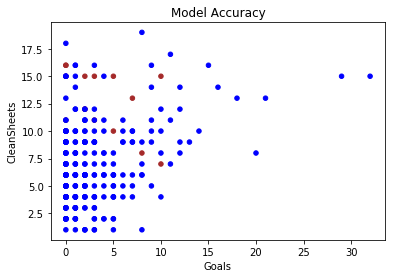

In [4]:
manyplayers = data[data['Pos_lab'] != 1]
manyplayers.head()

varofint = data[['Goals','CleanSheets']]

X_train, X_test, Y_train, Y_test = train_test_split(varofint, TopPlayer, test_size=0.10)

k5 = KNeighborsClassifier(n_neighbors = 5)

k5.fit(varofint, TopPlayer)
Y_k5_predict = k5.predict(varofint)
print(accuracy_score(TopPlayer,Y_k5_predict))
data['Predicted'] = Y_k5_predict
data

item_list = []
for i in range(289):
    if Y_k5_predict[i] == TopPlayer[i]:
        item_list.append('true')
    else:
        item_list.append('false')
len(item_list)
item_list

c_list = []
for k in item_list:
    if k == 'true':
        c_list.append('blue')
    if k == 'false':
        c_list.append('brown')
c_list
data['color'] = c_list

plot = data.plot(kind='scatter',
         x='Goals',
         y='CleanSheets',
        title='Model Accuracy',
         c=data['color'])
plot

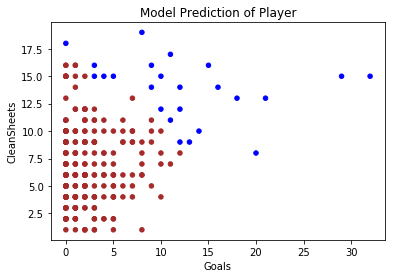

In [5]:
c_list = []
for k in Y_k5_predict:
    if k == 1:
        c_list.append('blue')
    if k == 0:
        c_list.append('brown')

data['color'] = c_list

plot = data.plot(kind='scatter',
         x='Goals',
         y='CleanSheets',
        title='Model Prediction of Player',
         c=data['color'],
        legend = False)

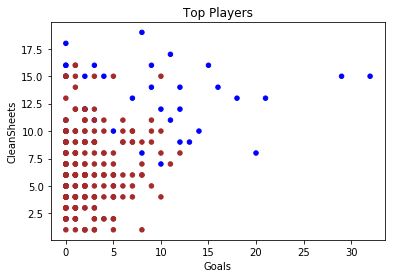

In [6]:
c_list = []
for k in TopPlayer:
    if k == 1:
        c_list.append('blue')
    if k == 0:
        c_list.append('brown')

data['color'] = c_list

plot = data.plot(kind='scatter',
         x='Goals',
         y='CleanSheets',
        title='Top Players',
         c=data['color'])

In [7]:
keep_these_vars = ['Minutes', 'Cost', 'CostChange', 'Dreamteam', 'SelectedBy', 
                   'PointsPerMatch', 'Goals', 'Assists',
                   'CleanSheets', 'YellowCards', 'RedCards', 'Saves', 'Bonus', 'BPS'
                  ]
predictors = data[keep_these_vars]
predictors.head()

,Minutes,Cost,CostChange,Dreamteam,SelectedBy,PointsPerMatch,Goals,Assists,CleanSheets,YellowCards,RedCards,Saves,Bonus,BPS
0,2905,106,16,11,56.7,8.4,32,12,15,1,0,0,26,881
1,2584,91,11,7,27.6,6.9,18,17,13,3,1,0,19,701
2,3074,131,6,8,37.7,5.9,29,2,15,5,0,0,31,781
3,3073,103,3,5,21.4,5.6,8,18,19,2,0,0,25,872
4,3218,97,2,3,19.4,5.4,11,10,17,4,0,0,23,826


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors, Top_50, test_size=0.10)

In [9]:
k5 = KNeighborsClassifier(n_neighbors = 5)
k5.fit(predictors, Top_50)
Y_k5_predict = k5.predict(predictors)
print(accuracy_score(Top_50,Y_k5_predict))

0.9134948096885813


In [10]:
true_positive = 0
true_negative = 0 
false_positive = 0 
false_negative = 0

for model_result in zip(Y_k5_predict, Top_50):
    #Create the true positive situation and add one for every occurance
    if model_result == (1,1):
        true_positive += 1
    #Create the true negative situation and add one for every occurance
    elif model_result == (0,0):
        true_negative += 1
    #Create the false positive situation e.g. model says republican won when democrat won and add one for every occurance
    elif model_result == (1,0):
        false_positive += 1
    #Create the false negative situation e.g. model says democrat won when republican won and add one for every occurance
    elif model_result == (0,1):
        false_negative += 1

print(f'''
=======================================
                        True Value
Predicted Value     Positive   Negative
        Positive    {true_positive}       {false_positive}
        Negative    {false_negative}        {true_negative}
=======================================
''')


                        True Value
Predicted Value     Positive   Negative
        Positive    31       6
        Negative    19        233



In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors, Top_50, test_size=0.10)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Top_50, Y_k5_predict, pos_label=1)
rates = pd.DataFrame(dict(fpr=false_positive_rate, tpr=true_positive_rate))
roc_auc = auc(rates['fpr'], rates['tpr'])
print('AUC: ', roc_auc)

AUC:  0.79744769874477


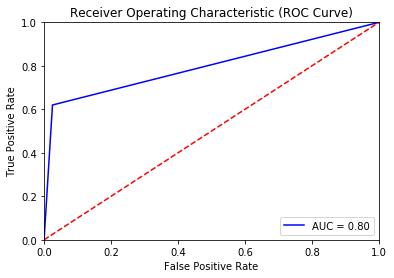

In [12]:
plt.plot(rates.fpr, rates.tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc = 'lower right')
plt.show()

In [13]:
players = pd.DataFrame({
    'Classification': ['Correctly Predicts Player as a Star Player', 'Incorrectly Predicts Player as a Star Player', 
                       'Incorrectly Predicts Player as an Average Player', 'Correctly Predicts Player as an Average Player'],
    'Number': [31, 6, 19, 233]
})
players

,Classification,Number
0,Correctly Predicts Player as a Star Player,31
1,Incorrectly Predicts Player as a Star Player,6
2,Incorrectly Predicts Player as an Average Player,19
3,Correctly Predicts Player as an Average Player,233


/Users/johnschoeffel/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


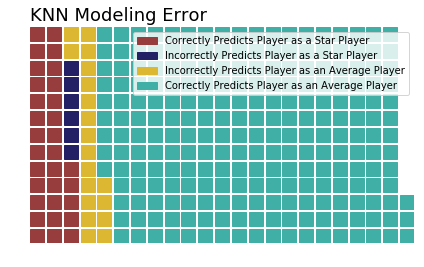

In [29]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=13,
    values=players.Number,
    labels=list(players.Classification),
    colors=["#983D3D", "#232066", "#DCB732", '#40B0A6'],
     title={
        'label': 'KNN Modeling Error',
        'loc': 'left',
        'fontdict': {
            'fontsize': 18}}
)

In [15]:
totalcorrect = pd.DataFrame({
    'Classification': ['Model is Correct', 'Model is Incorrect'],
    'Number': [264, 25]
})
totalcorrect

,Classification,Number
0,Model is Correct,264
1,Model is Incorrect,25


/Users/johnschoeffel/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


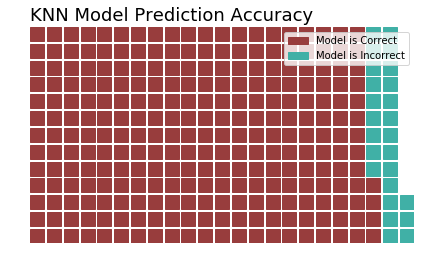

In [28]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=13,
    values=totalcorrect.Number,
    labels=list(totalcorrect.Classification),
    colors=["#983D3D", "#40B0A6"],
     title={
        'label': 'KNN Model Prediction Accuracy',
        'loc': 'left',
        'fontdict': {
            'fontsize': 18}}
)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors, TopPlayer, test_size=0.10)

In [18]:
k5 = KNeighborsClassifier(n_neighbors = 5)
k5.fit(predictors, TopPlayer)
Y_k5_predict = k5.predict(predictors)
print(accuracy_score(TopPlayer,Y_k5_predict))

0.9377162629757786


In [19]:
true_positive = 0
true_negative = 0 
false_positive = 0 
false_negative = 0

for model_result in zip(Y_k5_predict, TopPlayer):
    #Create the true positive situation and add one for every occurance
    if model_result == (1,1):
        true_positive += 1
    #Create the true negative situation and add one for every occurance
    elif model_result == (0,0):
        true_negative += 1
    #Create the false positive situation e.g. model says republican won when democrat won and add one for every occurance
    elif model_result == (1,0):
        false_positive += 1
    #Create the false negative situation e.g. model says democrat won when republican won and add one for every occurance
    elif model_result == (0,1):
        false_negative += 1

print(f'''
=======================================
                        True Value
Predicted Value     Positive   Negative
        Positive    {true_positive}       {false_positive}
        Negative    {false_negative}        {true_negative}
=======================================
''')


                        True Value
Predicted Value     Positive   Negative
        Positive    19       2
        Negative    16        252

